# Lab 1
Julian Avila

Camilo Huertas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def F_ext(t, y):
  return 0.0

def f(t, y, k, p=2):
  return np.array([y[1], F_ext(t, y) - k * np.sign(y[0]) * np.abs(y[0])**(p - 1)])

def rk2_step(t, h, y, k, p):
  k1 = h * f(t, y, k, p)
  k2 = h * f(t + h / 2, y + k1 / 2, k, p)
  return y + (k1 + k2) / 2

def rk2_solver(a, b, n, k, p, y0):
  h = (b - a) / n
  t_values = np.linspace(a, b, n + 1)
  y_values = np.zeros((n + 1, 2))
  y_values[0] = y0

  for i in range(n):
    y_values[i + 1] = rk2_step(t_values[i], h, y_values[i], k, p)

  return t_values, y_values[:, 0], y_values[:, 1]

def plot_results(t_values, y_values, y_derivative):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  axes[0].plot(t_values, y_values, color='gold')
  axes[0].set_title("RK2 - y(t)")
  axes[0].set_xlabel("t")
  axes[0].set_ylabel("y(t)")
  axes[0].grid(True)

  axes[1].plot(t_values, y_derivative, color='red')
  axes[1].set_title("RK2 - y'(t)")
  axes[1].set_xlabel("t")
  axes[1].set_ylabel("y'(t)")
  axes[1].grid(True)

  plt.tight_layout()
  plt.show()

def interactive_rk2(a=0, b=10, n=1000, k=1, p=2, y0_1=3, y0_2=-5):
  y0 = np.array([y0_1, y0_2])
  t_values, y_values, y_derivative = rk2_solver(a, b, n, k, p, y0)
  plot_results(t_values, y_values, y_derivative)

widgets.interactive(
  interactive_rk2,
  n=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='n'),
  k=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, description='k'),
  p=widgets.IntSlider(min=2, max=10, step=2, value=2, description='p'),
  y0_1=widgets.FloatSlider(min=-10, max=10, step=0.1, value=3, description='y0_1'),
  y0_2=widgets.FloatSlider(min=-10, max=10, step=0.1, value=-5, description='y0_2')
)

interactive(children=(IntSlider(value=0, description='a', max=1), IntSlider(value=10, description='b', max=30,…

# Part 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def f(t, y, k, m):
  return np.array([y[1], - (k / m) * y[0]])

def rk2_step(t, h, y, k, m):
  k1 = h * f(t, y, k, m)
  k2 = h * f(t + h / 2, y + k1 / 2, k, m)
  return y + (k1 + k2) / 2

def rk2_solver(a, b, n, k, m, y0):
  n = max(n, 1)
  h = (b - a) / n
  t_values = np.linspace(a, b, n + 1)
  y_values = np.empty((n + 1, 2))
  y_values[0] = y0

  for i in range(n):
    y_values[i + 1] = rk2_step(t_values[i], h, y_values[i], k, m)

  return t_values, y_values[:, 0], y_values[:, 1]

def analytical_solution(t, A, k, m):
  omega = np.sqrt(k / m)
  return A * np.cos(omega * t), -A * omega * np.sin(omega * t)

def plot_results(t_values, y_values, v_values, t_analytical, y_analytical, v_analytical):
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  axes[0].plot(t_values, y_values, label="RK2 y(t)", color='red')
  axes[0].plot(t_analytical, y_analytical, label="Analytical y(t)", linestyle="dashed", color='blue')
  axes[0].set_title("Position: RK2 vs Analytical")
  axes[0].set_xlabel("t")
  axes[0].set_ylabel("y(t)")
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(t_values, v_values, label="RK2 v(t)", color='gold')
  axes[1].plot(t_analytical, v_analytical, label="Analytical v(t)", linestyle="dashed", color='green')
  axes[1].set_title("Velocity: RK2 vs Analytical")
  axes[1].set_xlabel("t")
  axes[1].set_ylabel("v(t)")
  axes[1].legend()
  axes[1].grid(True)

  error = np.abs((y_values - y_analytical) / y_analytical)
  axes[2].plot(t_values, error, label="Absolute Relative Error", color='purple')
  axes[2].set_title("Absolute Relative Error in Position")
  axes[2].set_xlabel("t")
  axes[2].set_ylabel("Error")
  axes[2].legend()
  axes[2].grid(True)

  plt.tight_layout()
  plt.show()

def interactive_rk2(a=0, b=10, n=1000, k=1, m=1, A=3):
  y0 = np.array([A, 0])
  t_values, y_values, v_values = rk2_solver(a, b, n, k, m, y0)
  t_analytical = np.linspace(a, b, max(n, 1) + 1)
  y_analytical, v_analytical = analytical_solution(t_analytical, A, k, m)
  plot_results(t_values, y_values, v_values, t_analytical, y_analytical, v_analytical)

widgets.interactive(
  interactive_rk2,
  n=widgets.IntSlider(min=10, max=5000, step=10, value=1000, description='n'),
  k=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='k'),
  m=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='m'),
  A=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=3, description='A')
)

interactive(children=(IntSlider(value=0, description='a', max=1), IntSlider(value=10, description='b', max=30,…

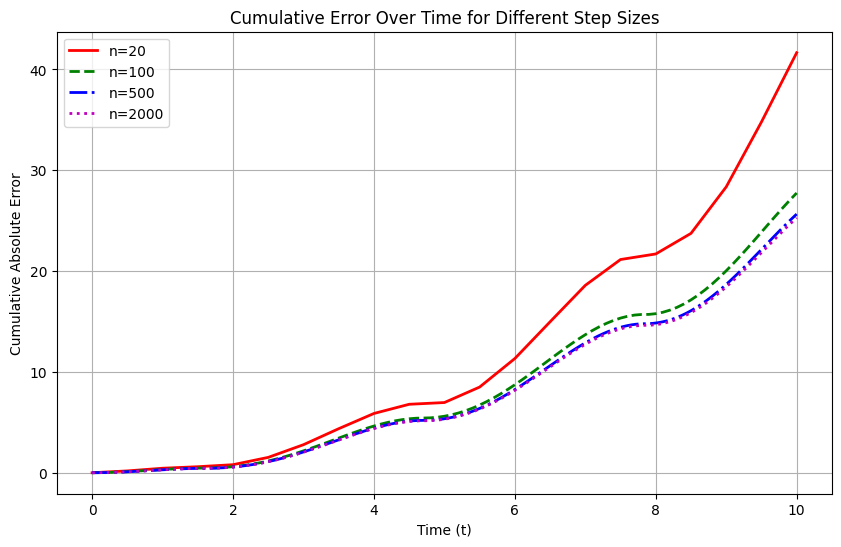

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y, k, m):
  return np.array([y[1], - (k / m) * y[0]])

def rk2_step(t, h, y, k, m):
  k1 = h * f(t, y, k, m)
  k2 = h * f(t + h / 2, y + k1 / 2, k, m)
  return y + (k1 + k2) / 2

def rk2_solver(a, b, n, k, m, y0):
  h = (b - a) / n
  t_values = np.linspace(a, b, n + 1)
  y_values = np.empty((n + 1, 2))
  y_values[0] = y0

  for i in range(n):
    y_values[i + 1] = rk2_step(t_values[i], h, y_values[i], k, m)

  return t_values, y_values[:, 0]

def analytical_solution(t, A, k, m):
  omega = np.sqrt(k / m)
  return A * np.cos(omega * t)

def cumulative_absolute_error(a, b, n, k, m, A):
  y0 = np.array([A, 0])
  t_values, y_values = rk2_solver(a, b, n, k, m, y0)
  y_analytical = analytical_solution(t_values, A, k, m)
  cum_error = np.cumsum(np.abs(y_values - y_analytical))
  return t_values, cum_error

def plot_cumulative_error(a=0, b=10, k=1, m=1, A=3, n_values=[20, 100, 500, 2000]):
  plt.figure(figsize=(10, 6))

  colors = ['r', 'g', 'b', 'm']
  linestyles = ['-', '--', '-.', ':']

  for i, n in enumerate(n_values):
    t_values, cum_error = cumulative_absolute_error(a, b, n, k, m, A)
    plt.plot(t_values, cum_error, label=f"n={n}", color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], linewidth=2)

  plt.xlabel("Time (t)")
  plt.ylabel("Cumulative Absolute Error")
  plt.title("Cumulative Error Over Time for Different Step Sizes")
  plt.legend()
  plt.grid(True)
  plt.show()

plot_cumulative_error()

#Part 3

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time

def analytical_solution(t, A, k, m):
    omega = np.sqrt(k / m)
    return A * np.cos(omega * t)

def f(t, y, k, m):
    return np.array([y[1], -k / m * y[0]])

def rk2_step(t, h, y, k, m):
    k1 = h * f(t, y, k, m)
    k2 = h * f(t + h / 2, y + k1 / 2, k, m)
    return y + (k1 + k2) / 2

def rk4_step(t, h, y, k, m):
    k1 = h * f(t, y, k, m)
    k2 = h * f(t + h / 2, y + k1 / 2, k, m)
    k3 = h * f(t + h / 2, y + k2 / 2, k, m)
    k4 = h * f(t + h, y + k3, k, m)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def rk45_step(t, h, y, k, m):
    global rk45_steps
    rk45_steps += 1
    k1 = h * f(t, y, k, m)
    k2 = h * f(t + h / 4, y + k1 / 4, k, m)
    k3 = h * f(t + 3 * h / 8, y + 3 * k1 / 32 + 9 * k2 / 32, k, m)
    k4 = h * f(t + 12 * h / 13, y + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197, k, m)
    k5 = h * f(t + h, y + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104, k, m)
    k6 = h * f(t + h / 2, y - 8 * k1 / 27 + 2 * k2 - 3544 * k3 / 2565 + 1859 * k4 / 4104 - 11 * k5 / 40, k, m)
    return y + (16 * k1 / 135 + 6656 * k3 / 12825 + 28561 * k4 / 56430 - 9 * k5 / 50 + 2 * k6 / 55)

def solve_ode(method, a, b, n, k, m, y0):
    h = (b - a) / n
    t_values = np.linspace(a, b, n + 1)
    y_values = np.zeros((n + 1, 2))
    y_values[0] = y0
    for i in range(n):
        y_values[i + 1] = method(t_values[i], h, y_values[i], k, m)
    return t_values, y_values[:, 0], y_values[:, 1]

def interactive_comparison(A=1, k=1, m=1, n=1000):
    global rk45_steps
    rk45_steps = 0
    a, b = 0, 10
    y0 = np.array([A, 0])

    start = time.time()
    t_rk2, y_rk2, v_rk2 = solve_ode(rk2_step, a, b, n, k, m, y0)
    time_rk2 = time.time() - start

    start = time.time()
    t_rk4, y_rk4, v_rk4 = solve_ode(rk4_step, a, b, n, k, m, y0)
    time_rk4 = time.time() - start

    start = time.time()
    t_rk45, y_rk45, v_rk45 = solve_ode(rk45_step, a, b, n, k, m, y0)
    time_rk45 = time.time() - start

    t_analytical = np.linspace(a, b, n + 1)
    y_analytical = analytical_solution(t_analytical, A, k, m)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    axes[0].plot(t_rk2, y_rk2, label='RK2', linestyle='dashed')
    axes[0].plot(t_rk4, y_rk4, label='RK4', linestyle='dotted')
    axes[0].plot(t_rk45, y_rk45, label='RK45', linestyle='dashdot')
    axes[0].plot(t_analytical, y_analytical, label='Analytical', color='black')
    axes[0].set_title("Position vs Time")
    axes[0].legend()

    axes[1].plot(t_rk2, v_rk2, label='RK2', linestyle='dashed')
    axes[1].plot(t_rk4, v_rk4, label='RK4', linestyle='dotted')
    axes[1].plot(t_rk45, v_rk45, label='RK45', linestyle='dashdot')
    axes[1].set_title("Velocity vs Time")
    axes[1].legend()

    axes[2].bar(['RK2', 'RK4', 'RK45'], [time_rk2, time_rk4, time_rk45])
    axes[2].set_title("Computation Time")

    plt.show()
    print(f"RK45 Step Changes: {rk45_steps}")

widgets.interactive(
    interactive_comparison,
    A=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='A'),
    k=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='k'),
    m=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='m'),
    n=widgets.IntSlider(min=100, max=5000, step=100, value=1000, description='n')
)

interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=0.1), FloatSlider(value=1.0, descr…

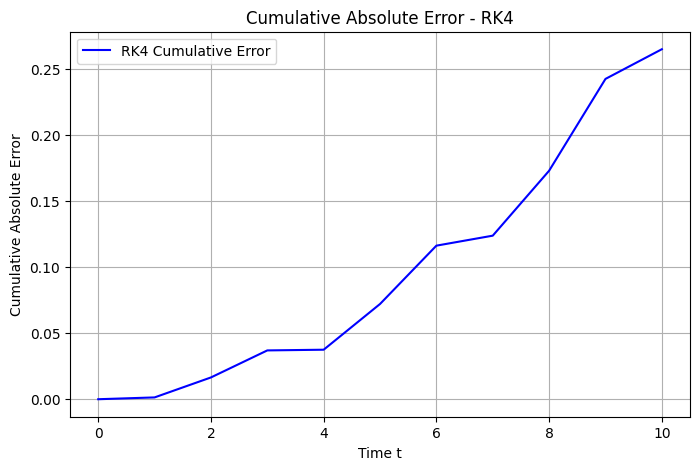

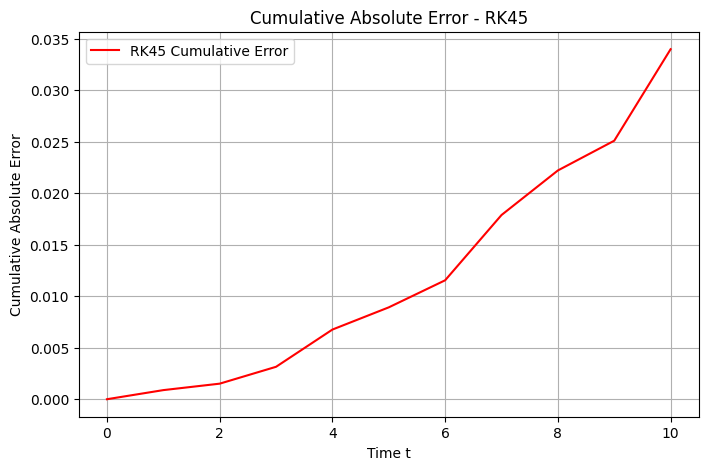

In [12]:
def cumulative_absolute_error(t_values, y_numerical, y_analytical):
    return np.cumsum(np.abs(y_numerical - y_analytical))

def plot_cumulative_error(method, solver, a, b, n, k, m, y0):
    t_values, y_values, _ = solve_ode(solver, a, b, n, k, m, y0)
    analytical = analytical_solution(t_values, y0[0], k, m)
    error = cumulative_absolute_error(t_values, y_values, analytical)

    plt.figure(figsize=(8, 5))
    plt.plot(t_values, error, label=f'{method} Cumulative Error', color='blue' if method == 'RK4' else 'red')
    plt.xlabel('Time t')
    plt.ylabel('Cumulative Absolute Error')
    plt.title(f'Cumulative Absolute Error - {method}')
    plt.legend()
    plt.grid(True)
    plt.show()

a, b = 0, 10
k, m = 1, 1
y0 = np.array([1, 0])
n = 10

plot_cumulative_error("RK4", rk4_step, a, b, n, k, m, y0)

plot_cumulative_error("RK45", rk45_step, a, b, n, k, m, y0)

#Part 4

  Method  Max Error  Execution Time (s)  Operations
0    RK4   2.057916            0.025303        4000
1   RK45   1.091024            0.013998         894


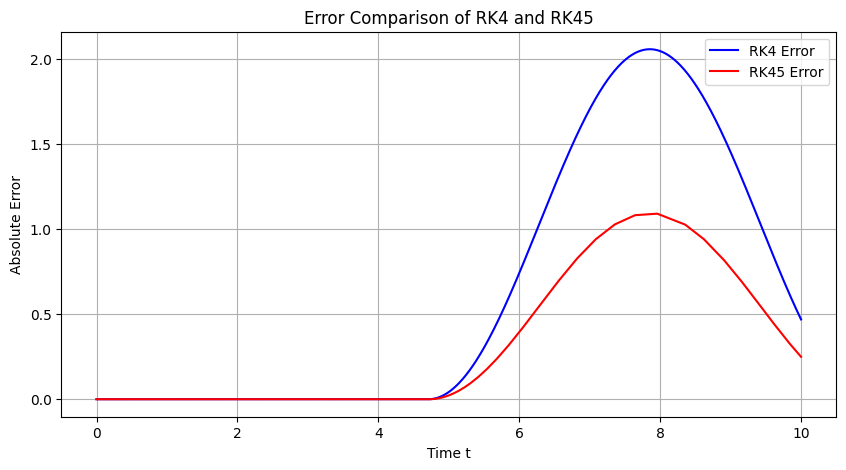

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

def eq1(t, y):
    return np.array([y[1], (y[1]**2 - y[0]**2) / (2 * y[0])])

def eq2(t, y):
    return np.array([y[1], -6 * y[0]**5])

def rk4_solver(f, a, b, n, y0):
    h = (b - a) / n
    t_values = np.linspace(a, b, n + 1)
    y_values = np.zeros((n + 1, 2))
    y_values[0] = y0

    for i in range(n):
        k1 = h * f(t_values[i], y_values[i])
        k2 = h * f(t_values[i] + h / 2, y_values[i] + k1 / 2)
        k3 = h * f(t_values[i] + h / 2, y_values[i] + k2 / 2)
        k4 = h * f(t_values[i] + h, y_values[i] + k3)
        y_values[i + 1] = y_values[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t_values, y_values[:, 0]

def rk45_solver(f, a, b, tol, y0):
    t = a
    y = y0
    t_values = [t]
    y_values = [y[0]]
    h = (b - a) / 100  # Paso inicial
    ops = 0

    while t < b:
        if t + h > b:
            h = b - t

        k1 = h * f(t, y)
        k2 = h * f(t + h / 4, y + k1 / 4)
        k3 = h * f(t + 3 * h / 8, y + 3 * k1 / 32 + 9 * k2 / 32)
        k4 = h * f(t + 12 * h / 13, y + 1932 * k1 / 2197 - 7200 * k2 / 2197 + 7296 * k3 / 2197)
        k5 = h * f(t + h, y + 439 * k1 / 216 - 8 * k2 + 3680 * k3 / 513 - 845 * k4 / 4104)
        k6 = h * f(t + h / 2, y - 8 * k1 / 27 + 2 * k2 - 3544 * k3 / 2565 + 1859 * k4 / 4104 - 11 * k5 / 40)

        y4 = y + (25 * k1 / 216 + 1408 * k3 / 2565 + 2197 * k4 / 4104 - k5 / 5)
        y5 = y + (16 * k1 / 135 + 6656 * k3 / 12825 + 28561 * k4 / 56430 - 9 * k5 / 50 + 2 * k6 / 55)

        error = np.linalg.norm(y5 - y4)

        if error < tol:
            t += h
            y = y5
            t_values.append(t)
            y_values.append(y[0])

        h *= min(max(0.84 * (tol / error) ** 0.25, 0.1), 4.0)
        ops += 6

    return np.array(t_values), np.array(y_values), ops

def analytical_solution(t):
    return 1 + np.sin(t)

a, b = 0, 10
y0 = np.array([1, 1])
n = 1000
tol = 1e-6

start = time.time()
t_rk4, y_rk4 = rk4_solver(eq1, a, b, n, y0)
time_rk4 = time.time() - start

start = time.time()
t_rk45, y_rk45, ops_rk45 = rk45_solver(eq1, a, b, tol, y0)
time_rk45 = time.time() - start

y_exact = analytical_solution(t_rk4)
error_rk4 = np.abs(y_rk4 - y_exact)
error_rk45 = np.abs(y_rk45 - analytical_solution(t_rk45))

data = pd.DataFrame({
    "Method": ["RK4", "RK45"],
    "Max Error": [np.max(error_rk4), np.max(error_rk45)],
    "Execution Time (s)": [time_rk4, time_rk45],
    "Operations": [n * 4, ops_rk45]
})

print(data)

plt.figure(figsize=(10, 5))
plt.plot(t_rk4, error_rk4, label="RK4 Error", color="blue")
plt.plot(t_rk45, error_rk45, label="RK45 Error", color="red")
plt.xlabel("Time t")
plt.ylabel("Absolute Error")
plt.title("Error Comparison of RK4 and RK45")
plt.legend()
plt.grid()
plt.show()

## [markdown]
##LAB 2

# Solución para oscilaciones no lineales

Utilice las rutina rk4 para estudiar oscilaciones anarmónicas probando potencias en el rango $p = 2-12$ para el potencial.

$$V(x)=\frac{1}{p}kx^{p} $$

No incluya todavía ninguna fuerza explícita dependiente del tiempo. Tenga
en cuenta que para grandes valores de p, las fuerzas y aceleraciones se hacen grandes cerca de los puntos de inflexión, por lo que puede necesitar un tamaño de paso más pequeño h que el utilizado para el oscilador armónico.

1.   Comprueba que la solución sigue siendo periódica con amplitud y periodo constantes para todas las condiciones iniciales, independientemente de las fuerzas que implementan efectos no lineales. Además, compruebe que la velocidad máxima se produce en $x= 0$ y la velocidad cero en el máximo valor de las $x-es$, siendo este último una consecuencia de la conservación de la energía.
2.   Compruebe que los osciladores no armónicos son ***no isócronos***, es decir, que vibraciones con amplitudes diferentes tienen periodos diferentes.
3. Explique por qué las formas de las oscilaciones cambian para diferentes valores de $p$.
4. Diseña un algoritmo para determinar el periodo T de la oscilación registrando los momentos en los que la masa pasa por el origen. Ten en cuenta que, como el movimiento puede ser asimétrico, debes registrar al menos tres veces para deducir el periodo.
5. Construye una gráfica del periodo deducido en función de la amplitud inicial.
6. Verifique que el movimiento es oscilatorio, pero no armónico, a medida que $p$ sepra el valor de $6$.

### Iniciamos resolviendo la ED con RK4:

#### p, k, x_i, v_i serán nuestras condiciones.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def rk4_simulation(p=6, k=1.0, x0=3.0, v0=0.0):
    a = 0.0
    b = 15.0
    n = 1000
    h = (b - a) / n

    t_values = [a]
    x_values = [x0]
    v_values = [v0]
    t = a
    y = np.array([x0, v0])

    def f(t, y):
        return np.array([y[1], - k * y[0]**(p-1)])

    for i in range(n):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2., y + k1/2.)
        k3 = h * f(t + h/2., y + k2/2.)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.
        t += h
        t_values.append(t)
        x_values.append(y[0])
        v_values.append(y[1])

    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)
    plt.plot(t_values, x_values, color='gold')
    plt.title("RK4 - x(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_values, v_values, color='red')
    plt.title("RK4 - v(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Velocidad")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


    plt.plot(t_values, x_values, color='gold', label='x(t)')
    plt.plot(t_values, v_values, color='red', label='v(t)')

    plt.title("RK4 - x(t) y v(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()  # Muestra la leyenda con las etiquetas de cada curva

    plt.show()


interact(rk4_simulation,
         p=IntSlider(min=2, max=12, step=2, value=6, description='p'),
         k=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='k'),
         x0=FloatSlider(min=-10, max=10, step=0.1, value=3.0, description='x₀'),
         v0=FloatSlider(min=-10, max=10, step=0.1, value=0.0, description='v₀'))



interactive(children=(IntSlider(value=6, description='p', max=12, min=2, step=2), FloatSlider(value=1.0, descr…

<function __main__.rk4_simulation(p=6, k=1.0, x0=3.0, v0=0.0)>

### Punto 1:
### 1.1 Compruebe que para cualquier valor inicial sigue siguiendo periodica la solucion:

#### 1.1.1 Que la amplitud no cambie:
no cambia
#### 1.2.1 Que el periodo no cambie:
no cambia

### 1.2 Que cuando x=0, la velocidad es máxima:
si ocurre

### Punto 2:

#### Comprobar que los osciladores no armonicos p =! 2, no son isócronos (periodo depende de la amplitud):

Hemos comprobado que, para un p=4, al aumentar la amplitud (o la velocidad inicial, que en este caso incrementa la energía total del sistema) el período disminuye, es decir, la frecuencia de las oscilaciones aumenta. Esto contrasta con el oscilador armónico (p=2p=2), donde el período es independiente de la amplitud.

#### ¿Por qué ocurre esto?:

En un Oscilador armonico la fuerza restauradora es lineal, haciendo que la rigidez sea constante en el tiempo.

Con osciladores armonicos la fuerza restauradora no es lineal, Por ejemplo, para p=4 la fuerza es F(x)=−kx^3. Esto significa que la fuerza no aumenta linealmente con el desplazamiento, sino que crece más rápidamente conforme x aumenta. En otras palabras, el sistema se vuelve “más rígido” para mayores amplitudes. Esta mayor rigidez hace que el sistema sea impulsado de regreso al equilibrio en un tiempo menor, reduciendo el período de oscilación e incrementando la frecuencia.

### Punto 3:

3. Explique por qué las formas de las oscilaciones cambian para diferentes valores de $p$.


Cuando varía el valor de p en el potencial, la forma del movimiento cambia notablemente. Para valores cercanos a 2, el sistema se comporta casi como un oscilador armónico, presentando oscilaciones suaves y sinusoidales. Sin embargo, a medida que p aumenta, el potencial se vuelve más empinado en los extremos y más plano en el centro, lo que significa que la fuerza restauradora actúa de manera mucho más abrupta cuando el desplazamiento es grande y es menos significativa cerca del equilibrio. Esto provoca que el movimiento se aleje de la forma sinusoidal típica, mostrando transiciones más rápidas en la aceleración y variaciones en la forma de la oscilación.

### Punto 4:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def rk4_simulation(p=6, k=1.0, x0=3.0, v0=0.0):
    a = 0.0
    b = 15.0
    n = 1000
    h = (b - a) / n

    t_values = [a]
    x_values = [x0]
    v_values = [v0]
    t = a
    y = np.array([x0, v0])

    def f(t, y):
        return np.array([y[1], - k * y[0]**(p-1)])

    for i in range(n):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2., y + k1/2.)
        k3 = h * f(t + h/2., y + k2/2.)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.
        t += h
        t_values.append(t)
        x_values.append(y[0])
        v_values.append(y[1])

    up_crossings = []
    for i in range(len(x_values)-1):
        if x_values[i] < 0 and x_values[i+1] >= 0:
            up_crossings.append(t_values[i+1])

    if len(up_crossings) >= 2:
        periodos = np.diff(up_crossings)
        T_avg = np.mean(periodos)
        print("Periodo aproximado (cruces de subida):", T_avg)
    else:
        print("No se detectaron suficientes cruces para calcular el periodo.")

    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)
    plt.plot(t_values, x_values, color='gold')
    plt.title("RK4 - x(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_values, v_values, color='red')
    plt.title("RK4 - v(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Velocidad")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(t_values, x_values, color='gold', label='x(t)')
    plt.plot(t_values, v_values, color='red', label='v(t)')
    plt.title("RK4 - x(t) y v(t)")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()
    plt.show()

interact(rk4_simulation,
         p=IntSlider(min=2, max=12, step=2, value=6, description='p'),
         k=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='k'),
         x0=FloatSlider(min=-10, max=10, step=0.1, value=3.0, description='x₀'),
         v0=FloatSlider(min=-10, max=10, step=0.1, value=0.0, description='v₀'))

interactive(children=(IntSlider(value=6, description='p', max=12, min=2, step=2), FloatSlider(value=1.0, descr…

<function __main__.rk4_simulation(p=6, k=1.0, x0=3.0, v0=0.0)>

### Punto 5:

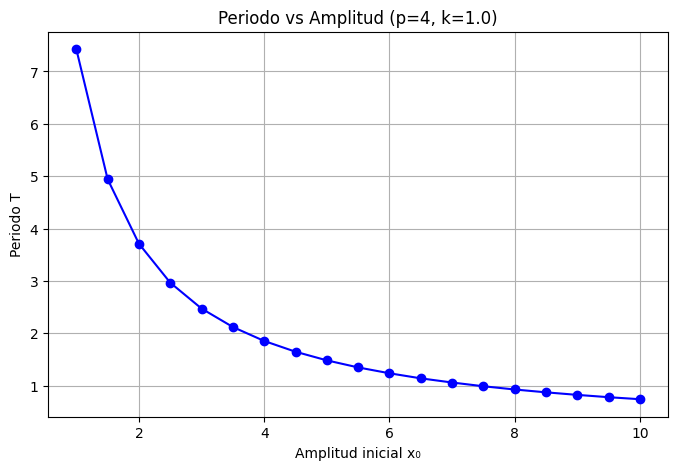

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def compute_period(p, k, x0, v0):
    a = 0.0
    b = 15.0
    n = 1000
    h = (b - a) / n

    t_values = [a]
    x_values = [x0]
    v_values = [v0]
    t = a
    y = np.array([x0, v0])

    def f(t, y):
        return np.array([y[1], - k * y[0]**(p-1)])

    for i in range(n):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2., y + k1/2.)
        k3 = h * f(t + h/2., y + k2/2.)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.
        t += h
        t_values.append(t)
        x_values.append(y[0])
        v_values.append(y[1])

    up_crossings = []
    for i in range(len(x_values)-1):
        if x_values[i] < 0 and x_values[i+1] >= 0:
            up_crossings.append(t_values[i+1])

    if len(up_crossings) >= 2:
        periodos = np.diff(up_crossings)
        return np.mean(periodos)
    else:
        return None

# Parámetros fijos
p = 4      # Puedes cambiar este valor
k = 1.0
v0 = 0.0

# Variamos la amplitud inicial
amplitudes = np.linspace(0.5, 10, 20)
periods = []

for x0 in amplitudes:
    T = compute_period(p, k, x0, v0)
    periods.append(T)

plt.figure(figsize=(8,5))
plt.plot(amplitudes, periods, 'o-', color='blue')
plt.xlabel("Amplitud inicial x₀")
plt.ylabel("Periodo T")
plt.title(f"Periodo vs Amplitud (p={p}, k={k})")
plt.grid(True)
plt.show()

### Punto 6:

6. Verifique que el movimiento es oscilatorio, pero no armónico, a medida que $p$ sepra el valor de $6$.